In [23]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Spam Data

Load the spam data set.
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [10]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [18]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [31]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts().to_dict().items())
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts().to_dict().items())

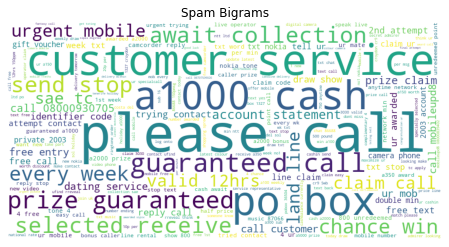

In [34]:
from wordcloud import WordCloud

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Spam Bigrams')
plt.show()

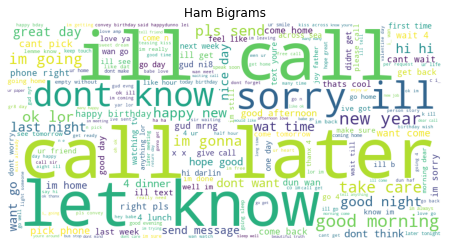

In [35]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Ham Bigrams')
plt.show()

### Is there any overlap in the bigrams for the spam data and the ham data?

In [38]:
overlap = set(spam_bigrams) & set(ham_bigrams)
overlap

{(('26th', 'july'), 1),
 (('3', 'week'), 1),
 (('4', '1'), 1),
 (('4', 'next'), 1),
 (('anyone', 'going'), 1),
 (('babe', 'make'), 1),
 (('back', 'id'), 1),
 (('bill', '3'), 1),
 (('call', 'text'), 1),
 (('called', 'left'), 1),
 (('chat', 'dont'), 1),
 (('come', 'take'), 1),
 (('could', 'meet'), 1),
 (('couple', 'day'), 1),
 (('day', 'fri'), 1),
 (('day', 'get'), 1),
 (('fall', 'love'), 1),
 (('free', 'next'), 1),
 (('get', 'phone'), 1),
 (('hey', 'got'), 1),
 (('hey', 'im'), 1),
 (('hey', 'really'), 1),
 (('hi', 'ya'), 1),
 (('hot', 'sticky'), 1),
 (('im', 'hot'), 1),
 (('ive', 'found'), 1),
 (('know', 'someone'), 1),
 (('left', 'message'), 1),
 (('let', 'send'), 1),
 (('like', 'see'), 1),
 (('link', 'sent'), 1),
 (('little', 'time'), 1),
 (('live', 'im'), 1),
 (('maybe', 'even'), 1),
 (('message', 'right'), 1),
 (('movie', 'collect'), 1),
 (('msg', 'dont'), 1),
 (('next', 'month'), 1),
 (('next', 'year'), 1),
 (('night', 'ur'), 1),
 (('ok', 'mobile'), 1),
 (('one', 'know'), 1),
 (('p

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [42]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts().to_dict().items())
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts().to_dict().items())

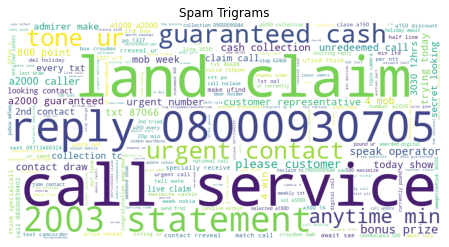

In [45]:
data = {k[0] + ' ' + k[2]: v for k, v in spam_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Spam Trigrams')
plt.show()

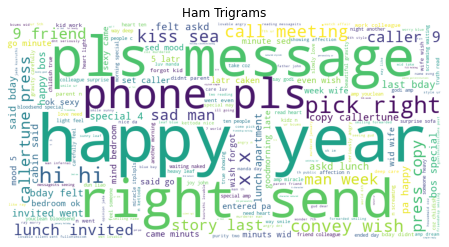

In [46]:
data = {k[0] + ' ' + k[2]: v for k, v in ham_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Ham Trigrams')
plt.show()